<a href="https://colab.research.google.com/github/samaart235/colabproject/blob/master/movxtv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving movxtv.csv to movxtv.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Text(0, 0.5, 'RottenTomatoes-Blue/IMDB-Orange')

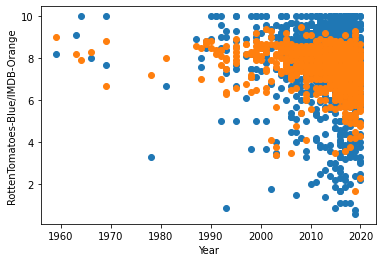

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
data=pd.read_csv("movxtv.csv",index_col=0)
new1=data.dropna()
new1['Rotten Tomatoes']=new1['Rotten Tomatoes'].str.replace("%"," ")
new1['Rotten Tomatoes']=new1['Rotten Tomatoes'].astype(float)
new1['Rotten Tomatoes']=new1['Rotten Tomatoes']/10.0
new2=new1.drop(columns=['type'])
#new2
new2['IvsZ']=new2['IMDb']-new2['Rotten Tomatoes']
plt.scatter(new2['Year'],new2['Rotten Tomatoes'])
plt.scatter(new2['Year'],new2['IMDb'])
plt.xlabel("Year")
plt.ylabel("RottenTomatoes-Blue/IMDB-Orange")

Text(0.5, 0, 'Year')

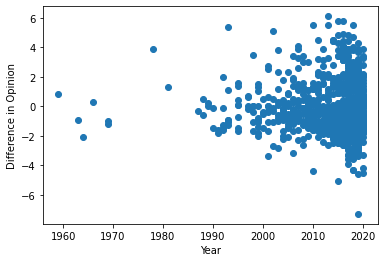

In [ ]:
plt.scatter(new2['Year'],new2['IvsZ'])
plt.ylabel("Difference in Opinion")
plt.xlabel("Year")

In [ ]:
one=new2[(new2['Netflix']==1) & (new2['Prime Video'])]
one
#mask2=mask1.loc[mask1['Prime Video']==1]
#mask3=mask2.loc[mask2['Hulu']==1]
#mask3 ##Subset of tv series from database which are available to watch on Netflix,Prime Video and Hulu

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,IvsZ
18,Parks and Recreation,2009,16+,8.6,9.3,1,1,1,0,-0.7
63,Star Trek: The Next Generation,1987,7+,8.6,8.9,1,1,1,0,-0.3
71,The Good Wife,2009,16+,8.3,9.4,1,1,1,0,-1.1
77,Schitt's Creek,2015,16+,8.4,5.0,1,0,1,0,3.4
88,Burn Notice,2007,7+,7.9,8.8,1,1,1,0,-0.9
99,Star Trek,1966,7+,8.3,8.0,1,1,1,0,0.3
123,Mushi-Shi,2005,16+,8.5,10.0,1,1,1,0,-1.5
140,Star Trek: Deep Space Nine,1993,7+,7.9,9.0,1,1,1,0,-1.1
162,Extras,2005,16+,8.3,8.9,1,0,1,0,-0.6
179,Star Trek: Voyager,1995,7+,7.8,7.7,1,1,1,0,0.1


In [ ]:
mask4=new2.groupby('Year')['Title'].nunique()
mask4
# A query to see the number of series sorted by the year they were released in.

Year
1959      1
1963      1
1964      1
1966      1
1969      2
1978      1
1981      1
1987      1
1988      2
1989      2
1990      2
1991      2
1992      5
1993      6
1995      8
1997      4
1998      6
1999     10
2000      4
2001     10
2002      6
2003      9
2004     14
2005     17
2006     17
2007     18
2008     16
2009     30
2010     24
2011     33
2012     27
2013     48
2014     50
2015     87
2016     87
2017    100
2018    111
2019    108
2020     59
Name: Title, dtype: int64

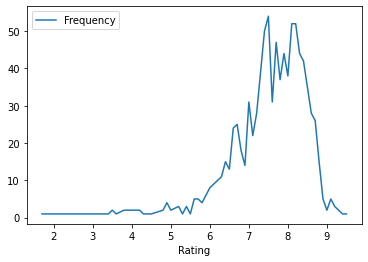

In [ ]:
mask4=new2.groupby('IMDb')['Title'].nunique()
df=pd.DataFrame({'Rating':mask4.index,'Frequency':mask4.values})
df.plot(x='Rating',y='Frequency')
#A plot to see the frequencies of different ratings given to the series over the dataset. 

In [ ]:
new3=new2.drop(columns="Age")
new3

,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,IvsZ
0,Breaking Bad,2008,9.5,9.6,1,0,0,0,-0.1
1,Stranger Things,2016,8.8,9.3,1,0,0,0,-0.5
2,Money Heist,2017,8.4,9.1,1,0,0,0,-0.7
3,Sherlock,2010,9.1,7.8,1,0,0,0,1.3
4,Better Call Saul,2015,8.7,9.7,1,0,0,0,-1.0
...,...,...,...,...,...,...,...,...,...
5509,Diary of a Future President,2020,5.5,10.0,0,0,0,1,-4.5
5517,Encore!,2019,7.4,6.8,0,0,0,1,0.6
5522,Spider-Man Unlimited,1999,6.5,5.0,0,0,0,1,1.5
5530,The Super Hero Squad Show,2009,6.1,5.0,0,0,0,1,1.1


Text(0.5, 0, 'Year')

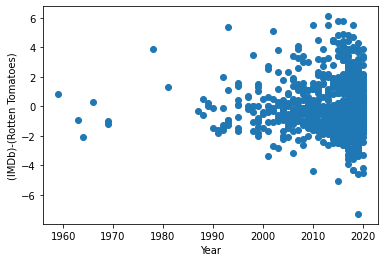

In [ ]:
plt.scatter(new3['Year'],new3['IvsZ'])
plt.ylabel("(IMDb)-(Rotten Tomatoes)")
plt.xlabel("Year")

In [ ]:
new3['n']